In [1]:
import json

import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd

plt.style.use('seaborn')

/tmp/ipykernel_1918292/3053543668.py:8: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn')


In [2]:
with open("/tmp/dicom_vs_dimble_timings.json") as f:
    timings = json.load(f)

df = pd.DataFrame(timings) * 1000

df

,dicom_times,dimble_times
0,10.893872,0.215417
1,6.502586,0.071315
2,163.932052,0.061256
3,129.916915,0.061937
4,246.343514,0.059573
...,...,...
995,8.262566,0.061196
996,8.786676,0.061516
997,4.129378,0.061206
998,3.914584,0.060224


<Axes: ylabel='Frequency'>

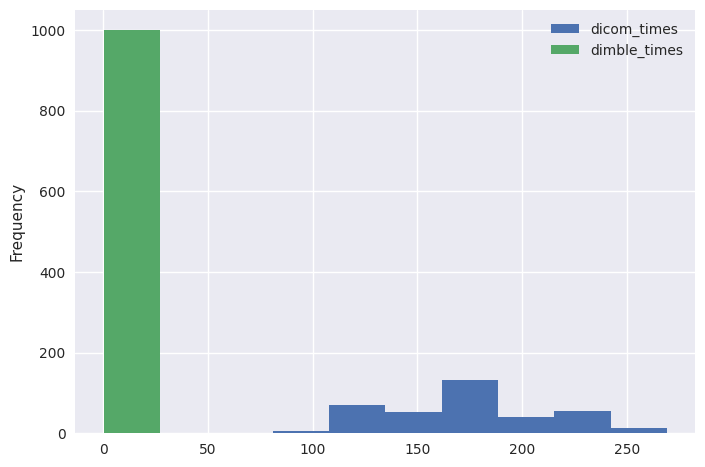

In [3]:
df.plot.hist()

<Axes: xlabel='dimble_times', ylabel='Density'>

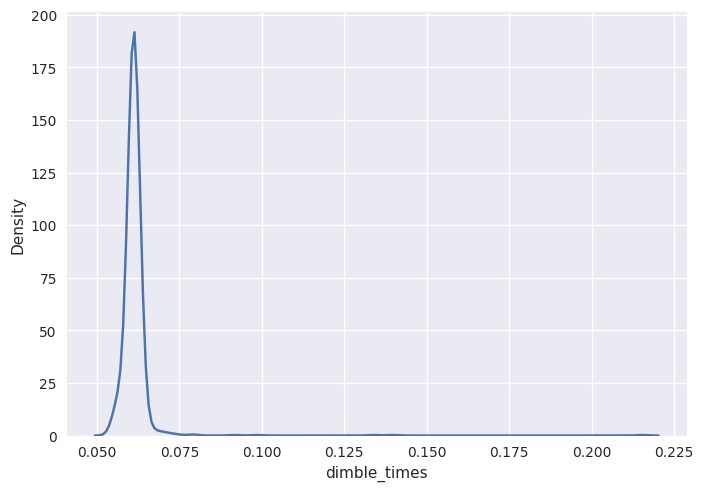

In [4]:
sns.kdeplot(df['dimble_times'])

<Axes: xlabel='dicom_times', ylabel='Density'>

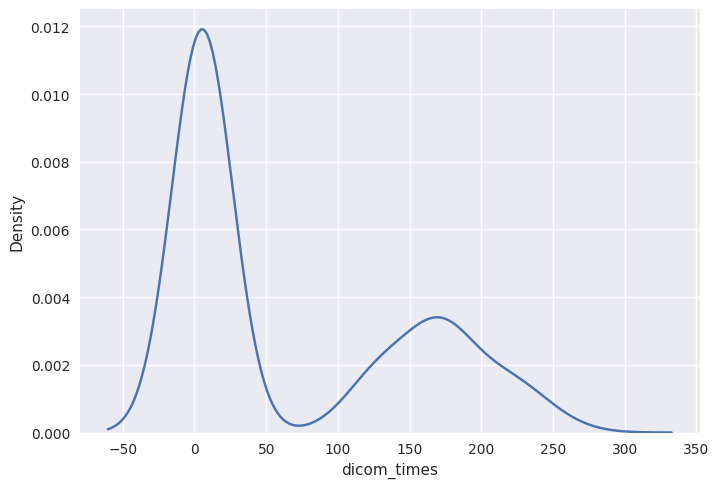

In [5]:
sns.kdeplot(df['dicom_times'])

In [6]:
df.describe().round(2)

,dicom_times,dimble_times
count,1000.00,1000.00
mean,67.06,0.06
std,84.12,0.01
min,3.05,0.05
25%,4.76,0.06
50%,6.36,0.06
75%,158.01,0.06
max,269.32,0.22


<Axes: ylabel='Density'>

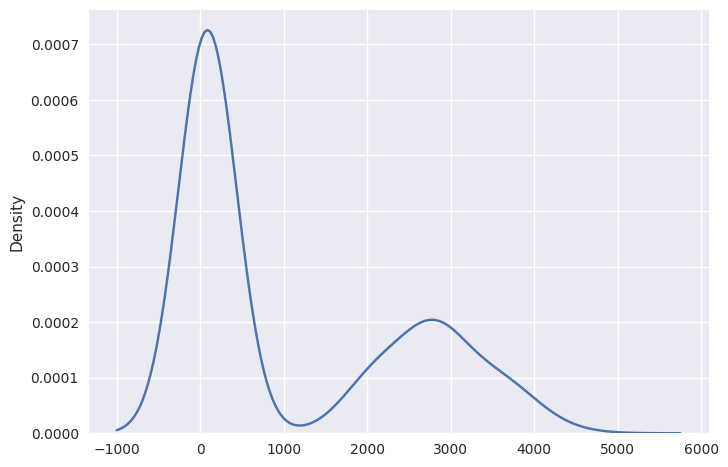

In [7]:
speedups = df.dicom_times / df.dimble_times
sns.kdeplot(speedups)

In [11]:
speedups.describe().round(2)

count    1000.00
mean     1098.76
std      1381.47
min        41.51
25%        78.10
50%       104.10
75%      2581.40
max      4709.77
dtype: float64

<Axes: ylabel='Count'>

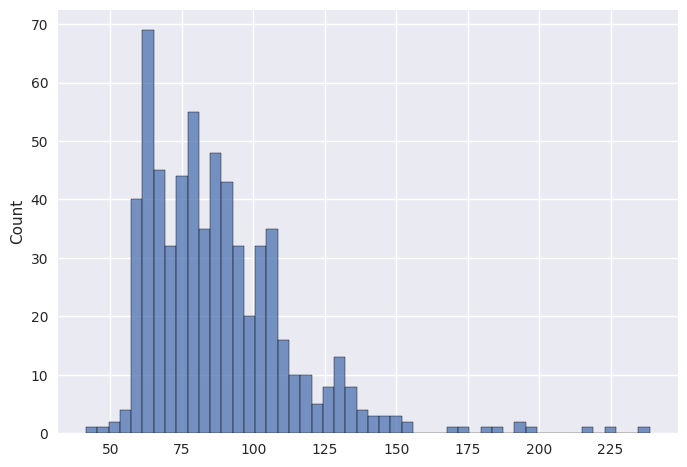

In [16]:
sns.histplot(speedups[speedups < 500], bins=50)

In [12]:
speedups.median().round(2)

104.1

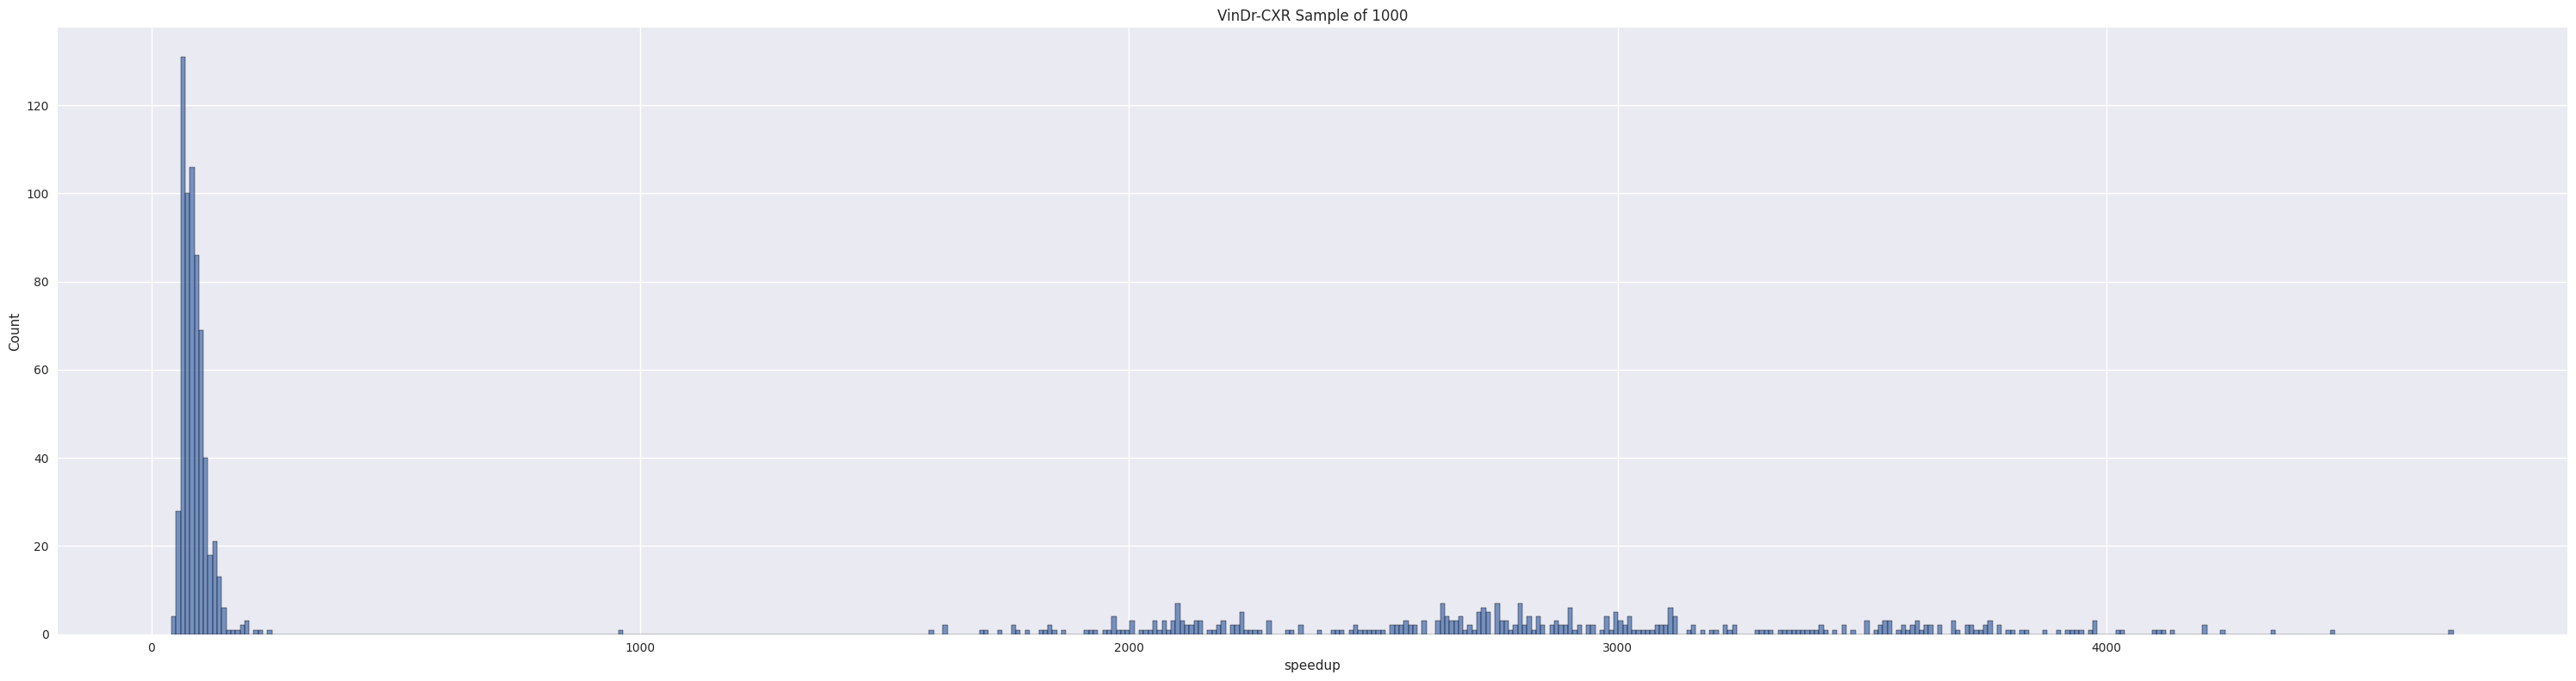

In [26]:
fig, ax = plt.subplots(figsize=(30, 8))
sns.histplot(speedups, bins=500, ax=ax)
ax.set_xlabel('speedup')
ax.set_title("VinDr-CXR Sample of 1000")
plt.tight_layout()
plt.show()

In [ ]:
speedups.plot.hist